In [11]:
import numpy as np

def generate_clusters(N,k):
    np.random.seed(2)
    points_per_cluster = float(N)/k
    X = []
    Y=[]
    for i in range(k):
        x = np.random.uniform(20000.0 , 200000.0)
        y = np.random.uniform(20 , 50)
        for j in range(int(points_per_cluster)):
            X.append([np.random.normal(x, 10000.0), np.random.normal(y, 2.0)])
            Y.append(i)
    X = np.array(X)
    Y = np.array(Y)
    return X , Y

In [12]:
data , data_2 = generate_clusters(100,5)

In [13]:
data[0:,1]

array([24.05832857, 19.09429222, 18.28721078, 18.95977172, 25.36220298,
       18.54193606, 19.58546756, 23.12778939, 20.79583746, 20.46491861,
       18.80022886, 20.30541889, 18.40256238, 20.47079656, 25.24052053,
       21.00323996, 23.49705468, 19.08935955, 21.8624921 , 22.31981043,
       32.15502422, 32.92232008, 33.00179934, 32.06419386, 32.67743737,
       35.38313736, 33.84317138, 29.10915413, 32.5617211 , 33.47838577,
       32.91888995, 29.94750085, 34.29693805, 34.51129146, 32.95935692,
       35.99535301, 32.64347365, 28.75944581, 32.67194157, 35.32280474,
       34.93837447, 33.20438019, 33.63515409, 35.31599569, 34.58425111,
       32.06833267, 27.81539682, 33.2747593 , 33.36878832, 37.67319294,
       33.38398295, 31.33577402, 31.38213419, 31.32065865, 31.46883542,
       30.64481936, 29.55625671, 33.36739461, 33.35025262, 35.02783053,
       18.9499049 , 17.40759141, 19.94107848, 22.12075991, 22.97713633,
       22.63005065, 21.19043522, 20.43387863, 16.772123  , 22.87

In [14]:
data_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

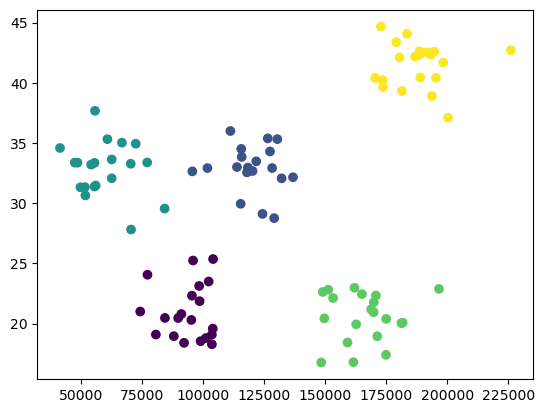

C:\Users\utibe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\utibe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [15]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

data , data_2 = generate_clusters(100,5)
scaled_data = scale(data)

## Show color map not using the model
plt.scatter(data[:,0], data[:,1], c=data_2.astype(float), cmap='viridis')
plt.show()

model = KMeans(n_clusters=5)

model = model.fit(scaled_data)

print(model.labels_)


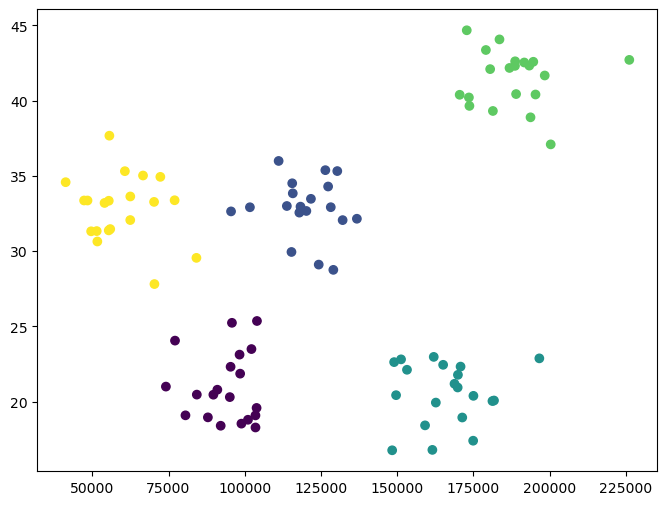

In [16]:
%matplotlib inline
#plot the cluster graph
import matplotlib.pyplot as plt

# color map using the model
plt.figure(figsize=(8,6))
plt.scatter(data[:,0],data[:,1] , c= model.labels_.astype(float), cmap='viridis')
plt.show()

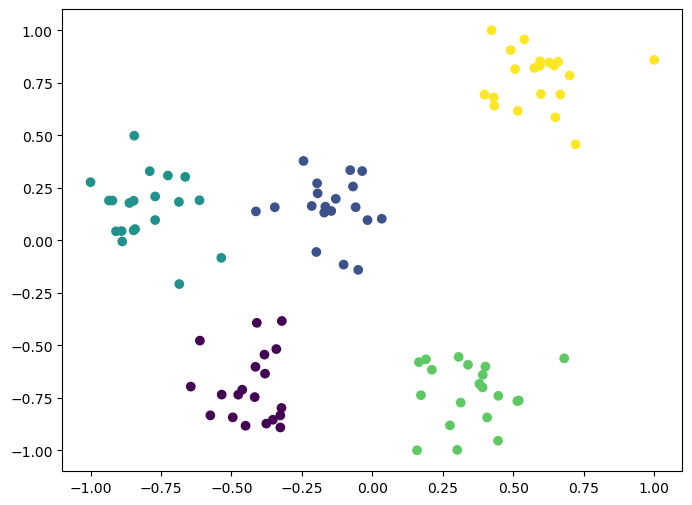

In [17]:
##SVC 
from sklearn.preprocessing import MinMaxScaler
import sklearn.svm as svm

scaler = MinMaxScaler(feature_range=(-1,1)).fit(data)
scaled_data = scaler.transform(data)
plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:,0], scaled_data[:,1] , c=data_2.astype(float), cmap='viridis')
plt.show()

In [52]:
model = svm.SVC(kernel='linear', C=1.0).fit(scaled_data , data_2)

In [53]:
def plotPredictions(clf):
    # Create a dense grid of points to sample 
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))
    
    # Convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Convert to a list of 2D (income, age) points
    samplePoints = np.c_[npx, npy]
    
    # Generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Draw the contour
    plt.scatter(scaled_data[:,0], scaled_data[:,1], c=data_2.astype(float)) # Draw the points
    plt.show()

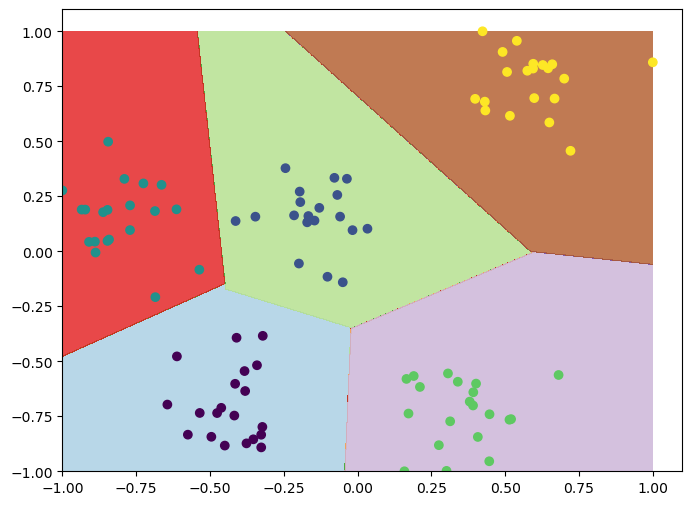

In [54]:
plotPredictions(model)

In [55]:
print(model.predict(scaler.transform([[200000, 30]])))

[3]
